In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Simulation parameters
epochs = 30000  # Number of time steps

C = 450e6  # Fixed cap (200 million tokens)
r = 0.0001  # Regrowth rate (minting factor)
initial_S = 150e6  # Initial supply (150 million tokens)

#hypothetic burn rate growth curve
burning_rate = np.concatenate([
    .5 * r / (1 + np.exp(-0.0005 * (np.arange(epochs // 2) - epochs / 4))),
    np.full(epochs // 2, .5 * r / (1 + np.exp(-0.0005 * (epochs // 4))))
])


In [3]:
# Initialize arrays
S = np.zeros(epochs)  # Supply over time
M = np.zeros(epochs)  # Minted tokens per epoch
B = np.zeros(epochs)  # Burned tokens per epoch

# Initial condition
S[0] = initial_S

# Simulate the dynamic supply model
for t in range(0, epochs):
    G = C - S[t]  # Supply gap
    M[t] = r * G  # Minting
    B[t] = burning_rate[t] * S[t] # Burning
    #noise = np.random.normal(0, 0.01 * B[t])
    #B[t] += noise
    if t < epochs - 1:
        S[t+1] = S[t] + M[t] - B[t]  # Supply update


In [4]:

# Convert results to a DataFrame
df = pd.DataFrame({
    "Epoch": np.arange(epochs),
    "Supply": S,
    "Minted": M,
    "Burned": B
})
df["Gap"] = C - df["Supply"]
df.head()

,Epoch,Supply,Minted,Burned,Gap
0,0,1.500000e+08,30000.000000,172.330274,3.000000e+08
1,1,1.500298e+08,29997.017233,172.448765,2.999702e+08
2,2,1.500597e+08,29994.034776,172.567325,2.999403e+08
3,3,1.500895e+08,29991.052629,172.685955,2.999105e+08
4,4,1.501193e+08,29988.070793,172.804656,2.998807e+08


In [5]:

df.tail()

,Epoch,Supply,Minted,Burned,Gap
29995,29995,3.028525e+08,14714.747539,14794.688506,1.471475e+08
29996,29996,3.028524e+08,14714.755533,14794.684601,1.471476e+08
29997,29997,3.028524e+08,14714.763526,14794.680696,1.471476e+08
29998,29998,3.028523e+08,14714.771518,14794.676792,1.471477e+08
29999,29999,3.028522e+08,14714.779508,14794.672889,1.471478e+08


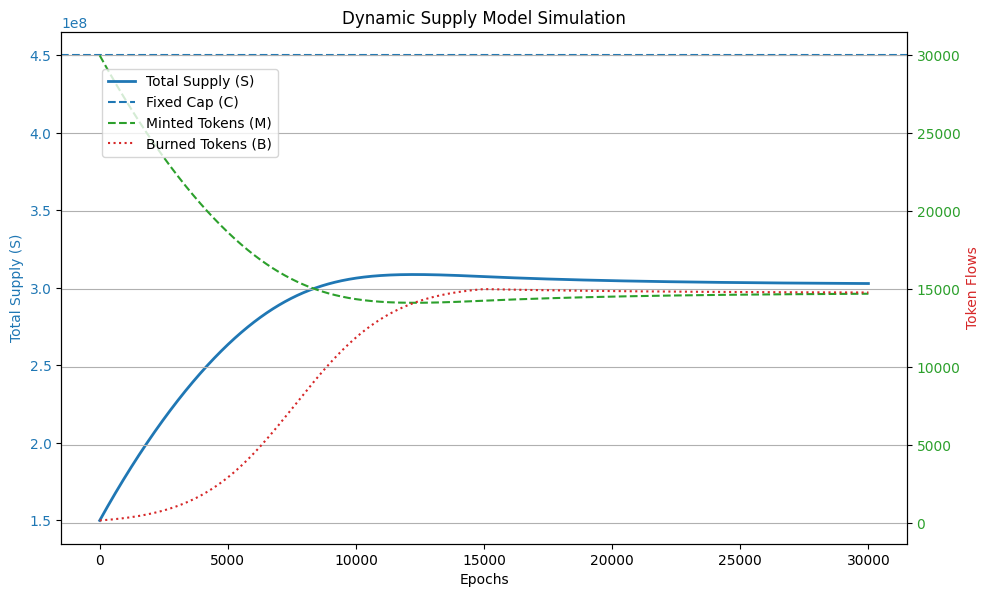

In [6]:

# Display the data
# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the stocks (Supply)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Total Supply (S)", color="tab:blue")
ax1.plot(df["Epoch"], df["Supply"], label="Total Supply (S)", color="tab:blue", linewidth=2)
ax1.axhline(y=C, color="tab:blue", linestyle="--", label="Fixed Cap (C)")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Create a second y-axis for the flows (Minted and Burned)
ax2 = ax1.twinx()
ax2.set_ylabel("Token Flows", color="tab:red")
ax2.plot(df["Epoch"], df["Minted"], label="Minted Tokens (M)", color="tab:green", linestyle="dashed")
ax2.plot(df["Epoch"], df["Burned"], label="Burned Tokens (B)", color="tab:red", linestyle="dotted")
ax2.tick_params(axis='y', labelcolor="tab:green")

# Add legends
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.title("Dynamic Supply Model Simulation")
plt.grid(True)
plt.show()
